In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
import os

# Change the directory path to the correct location of the input files
path = 'happiness_score_dataset.csv'

try:
    # List all files in the directory
    files = os.listdir(path)
    print(files)
except FileNotFoundError:
    print("Error: The system cannot find the path specified.")

Error: The system cannot find the path specified.


In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) # fix: convert to integer
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [12]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [13]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
url = 'https://github.com/dsrscientist/DSData/raw/master/happiness_score_dataset.csv'
df1 = pd.read_csv(url, delimiter=',', nrows=nRowsRead)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 158 rows and 12 columns


In [17]:
df1.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


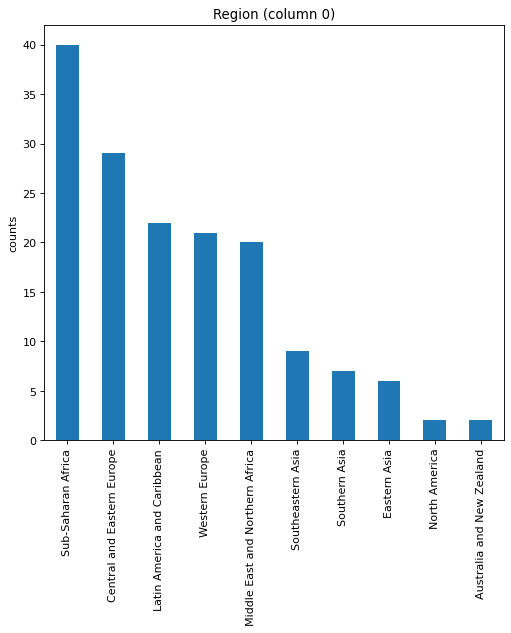

In [18]:
plotPerColumnDistribution(df1, 10, 5)


In [25]:
import seaborn as sns


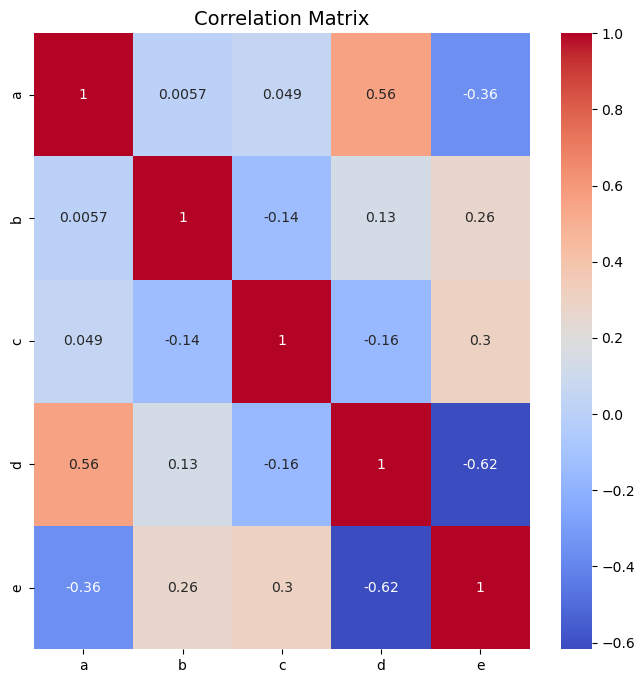

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, graphWidth):
    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title('Correlation Matrix', fontsize=14)
    plt.show()

# Example usage:
df1 = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
plotCorrelationMatrix(df1, 8)


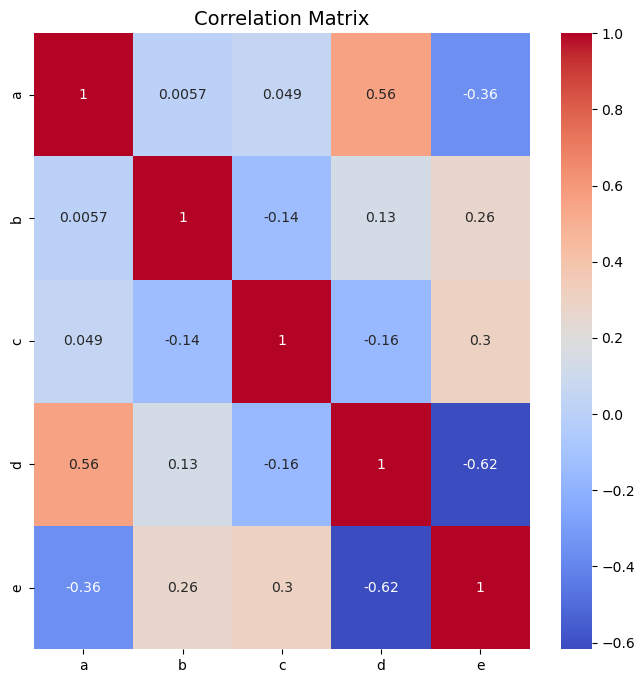

In [28]:

plotCorrelationMatrix(df1, 8)


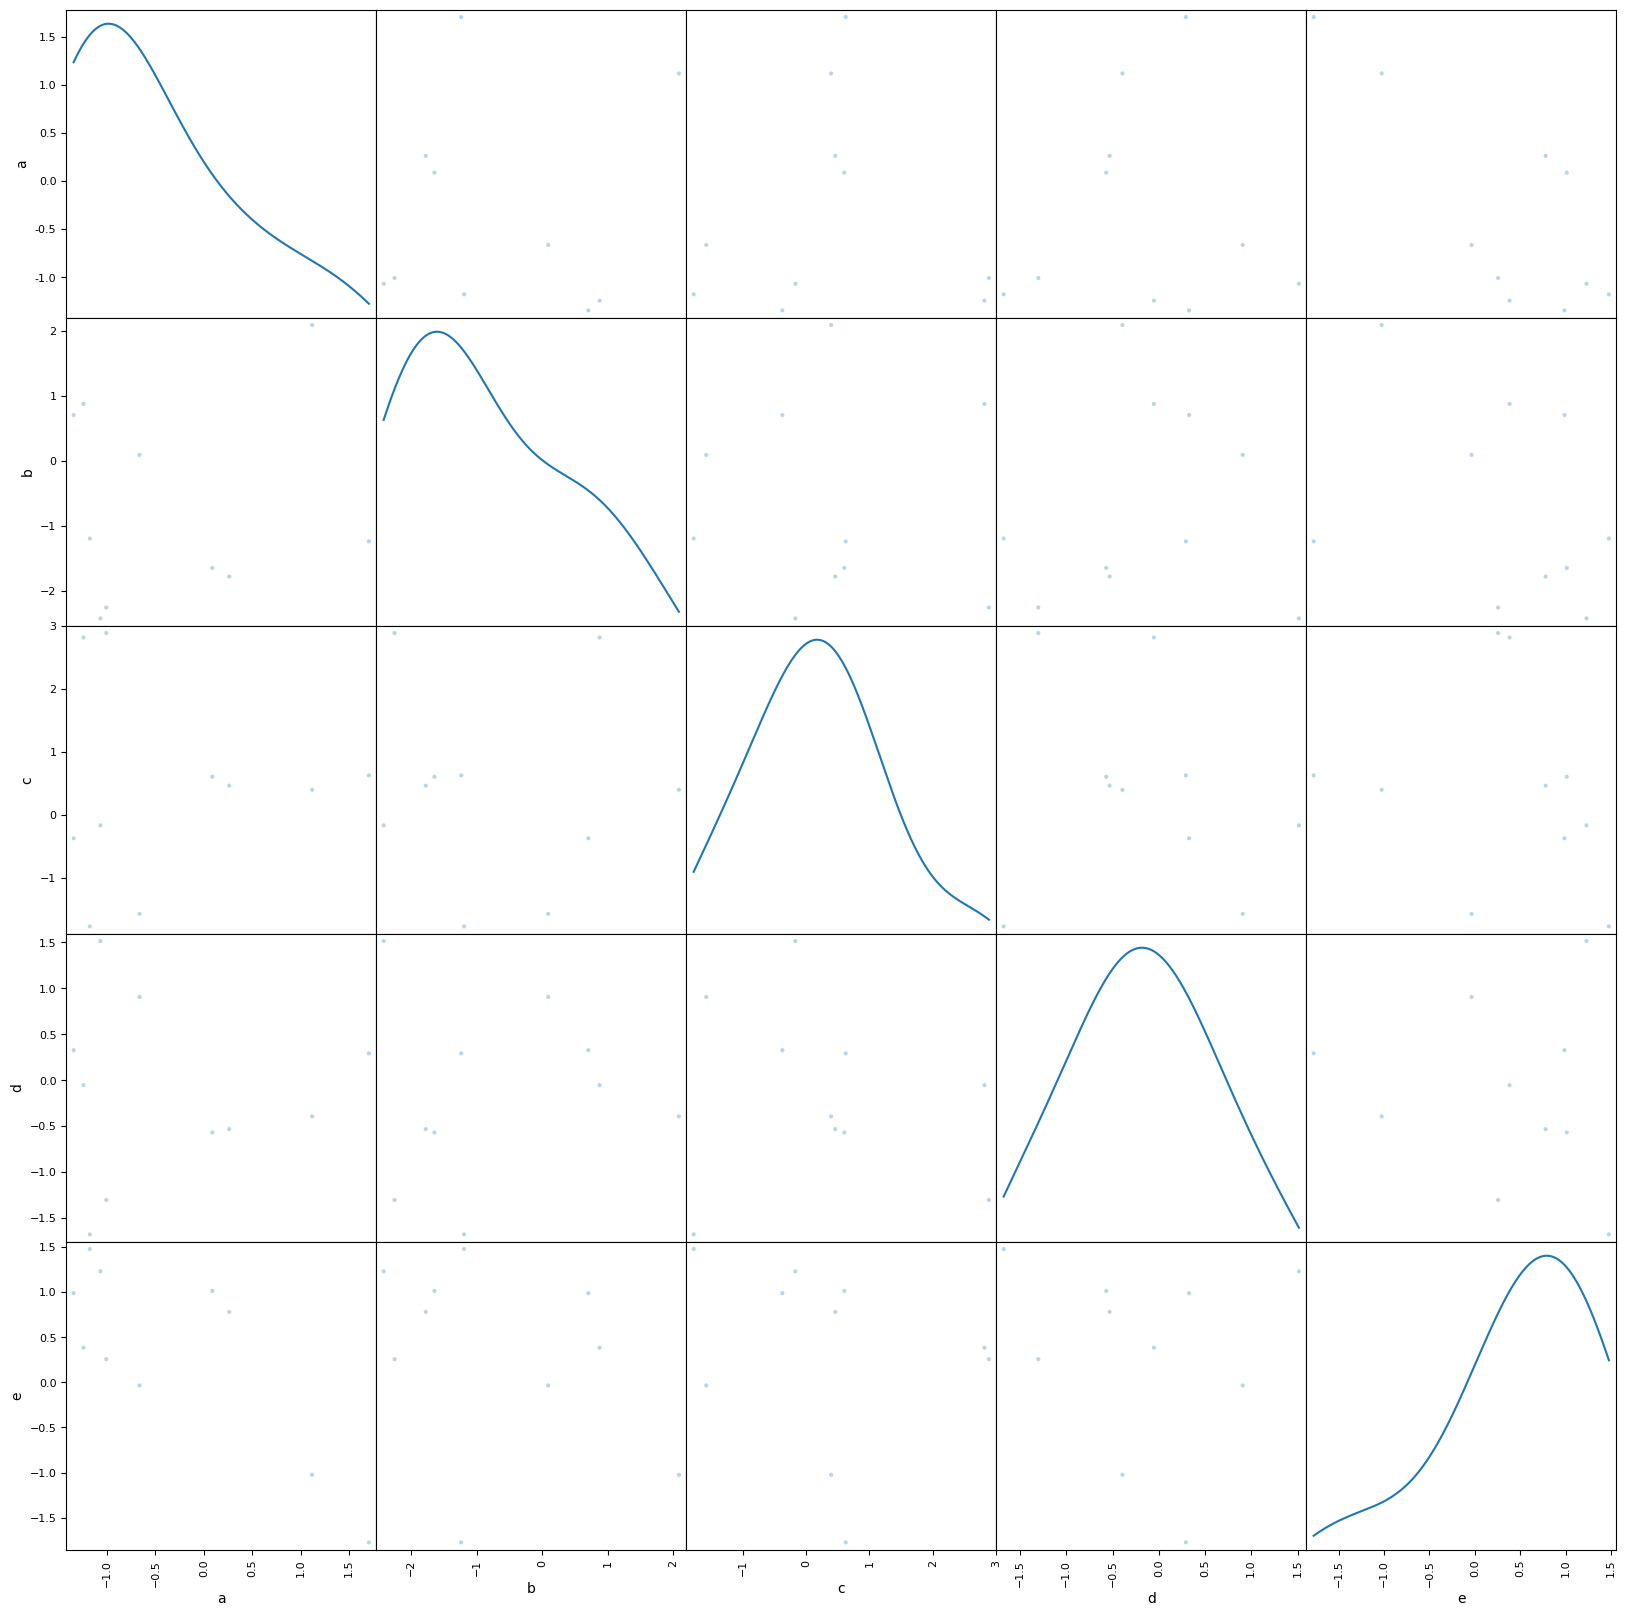

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotScatterMatrix(df, plotSize, textSize):
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=[plotSize, plotSize], diagonal='kde')
    for s in scatter_matrix.reshape(-1):
        s.xaxis.label.set_fontsize(textSize)
        s.yaxis.label.set_fontsize(textSize)
    plt.show()

# Example usage:
df1 = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
plotScatterMatrix(df1, 20, 10)


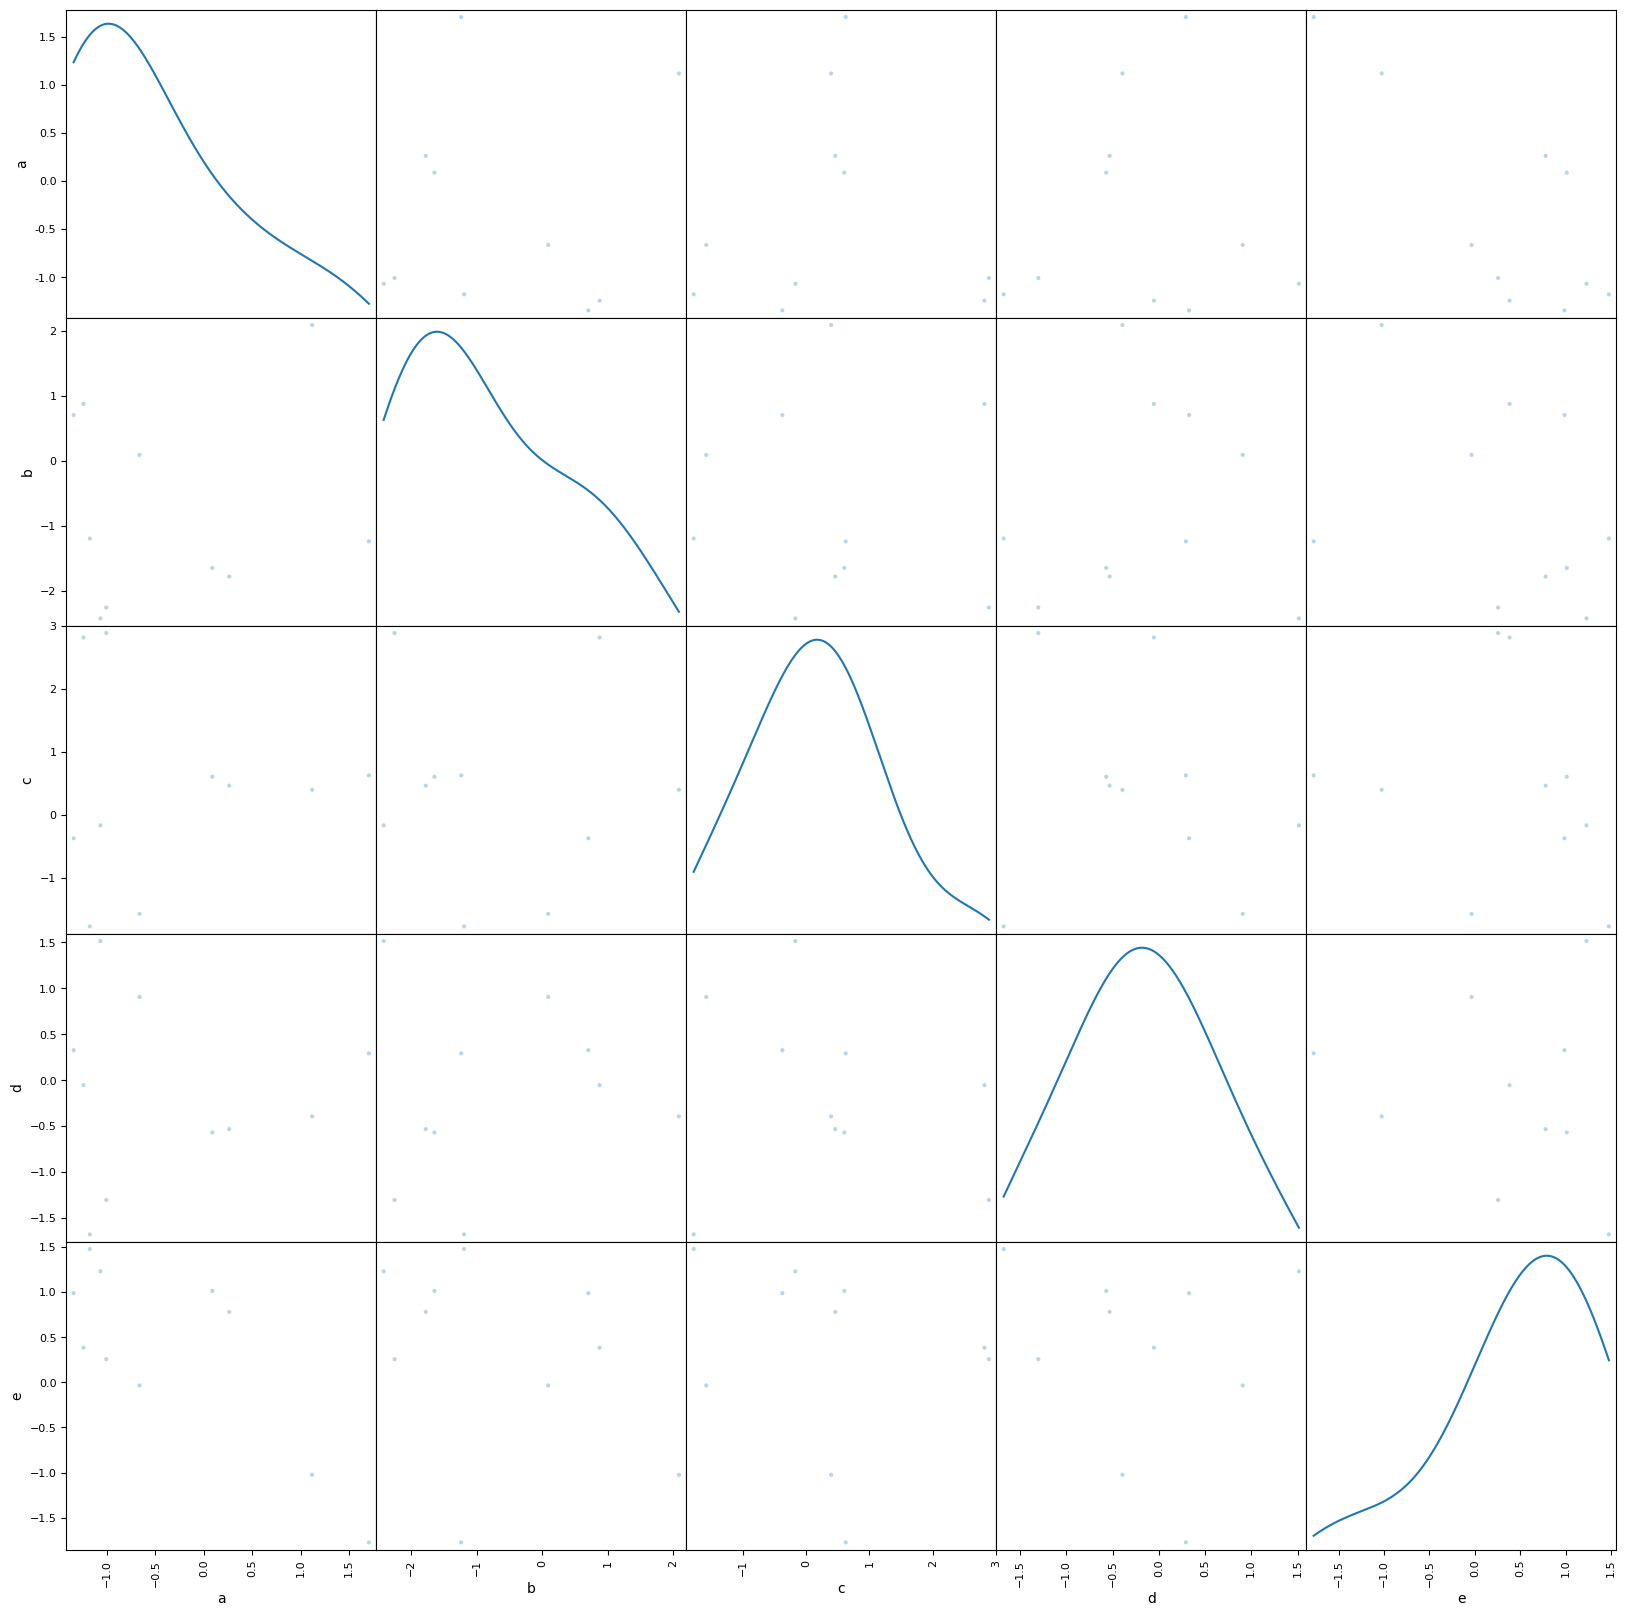

In [31]:
plotScatterMatrix(df1, 20, 10)

In [34]:
import pandas as pd

nRowsRead = 1000  # specify 'None' if you want to read the whole file
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df2 = pd.read_csv(url, delimiter=',', nrows=nRowsRead)
df2.dataframeName = '2016.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')



There are 158 rows and 12 columns


In [35]:
df2.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


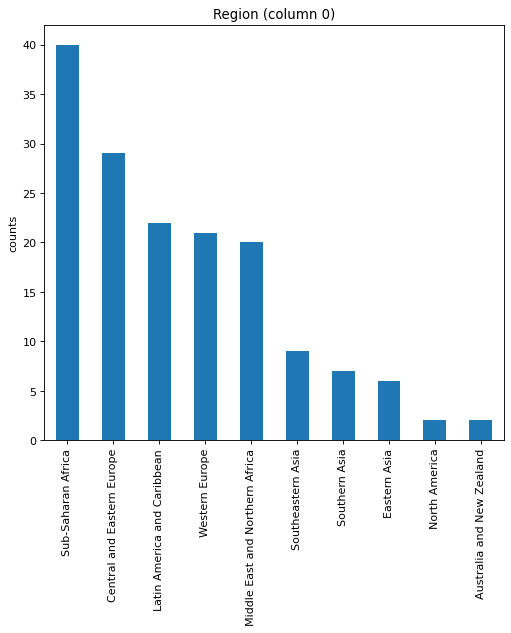

In [36]:
plotPerColumnDistribution(df2, 10, 5)


In [41]:
import matplotlib.pyplot as plt



C:\Users\ABHI\AppData\Local\Temp\ipykernel_13868\4222523700.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


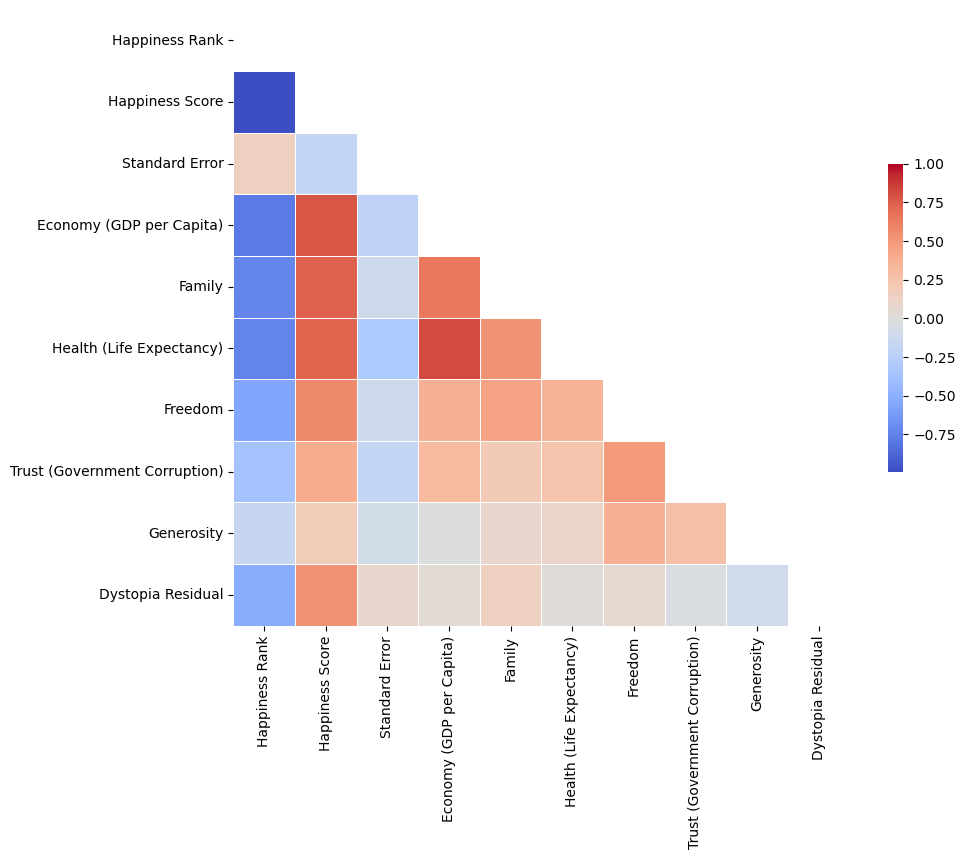

In [43]:
plotCorrelationMatrix(df2, (10, 8))


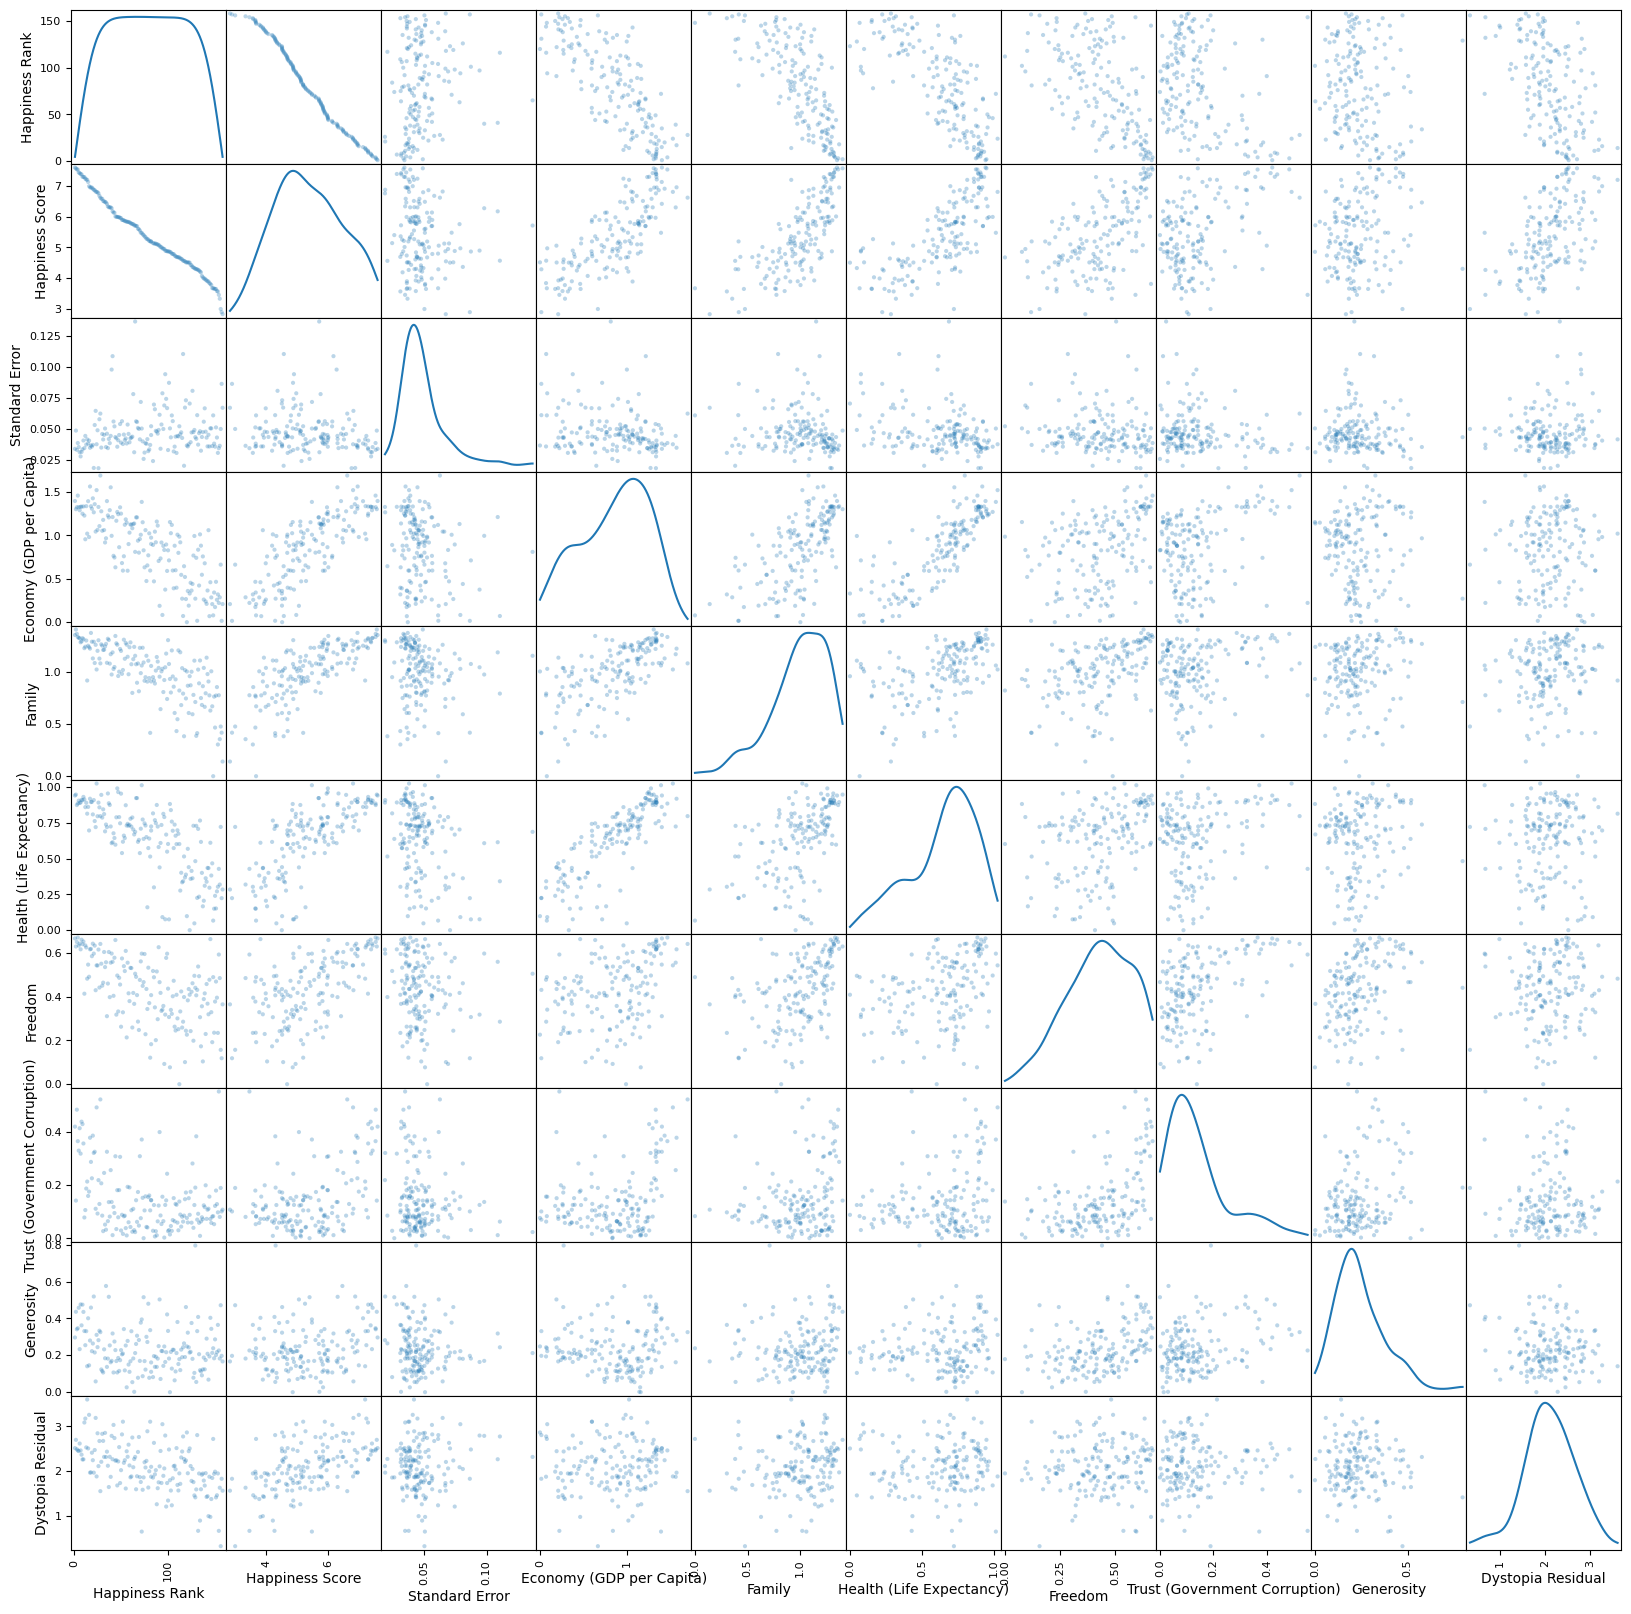

In [44]:
plotScatterMatrix(df2, 20, 10)

In [51]:
import pandas as pd

# specify number of rows to read, or None to read the whole file
nRowsRead = 1000 

# load the csv file from the url
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df3 = pd.read_csv(url, delimiter=',', nrows=nRowsRead)

# set dataframe name and print dimensions
df3.dataframeName = '2017.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')




There are 158 rows and 12 columns


In [52]:
df3.head(5)



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


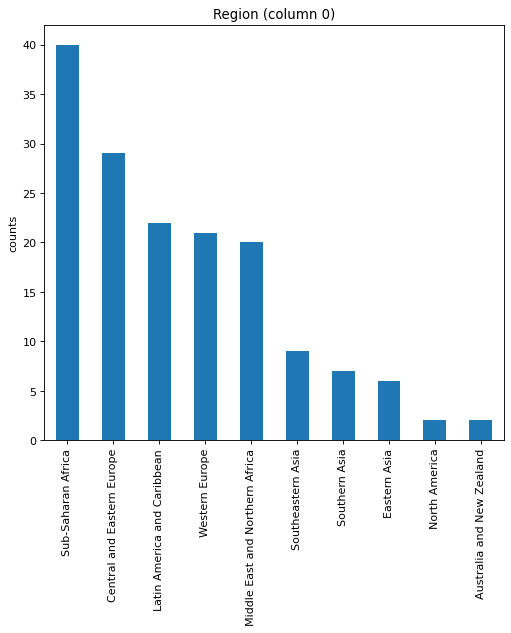

In [53]:
plotPerColumnDistribution(df3, 10, 5)


In [55]:
import matplotlib.pyplot as plt



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, figSize=(10,8)):
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=figSize)
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot=True, fmt=".2f")
    
    plt.show()

nRowsRead = 1000
df3 = pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv', delimiter=',', nrows=nRowsRead)
df3.dataframeName = '2017.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

plotCorrelationMatrix(df3, (10, 8))


ParserError: Error tokenizing data. C error: Expected 1 fields in line 27, saw 367


There are 158 rows and 12 columns


C:\Users\ABHI\AppData\Local\Temp\ipykernel_13868\2041706738.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


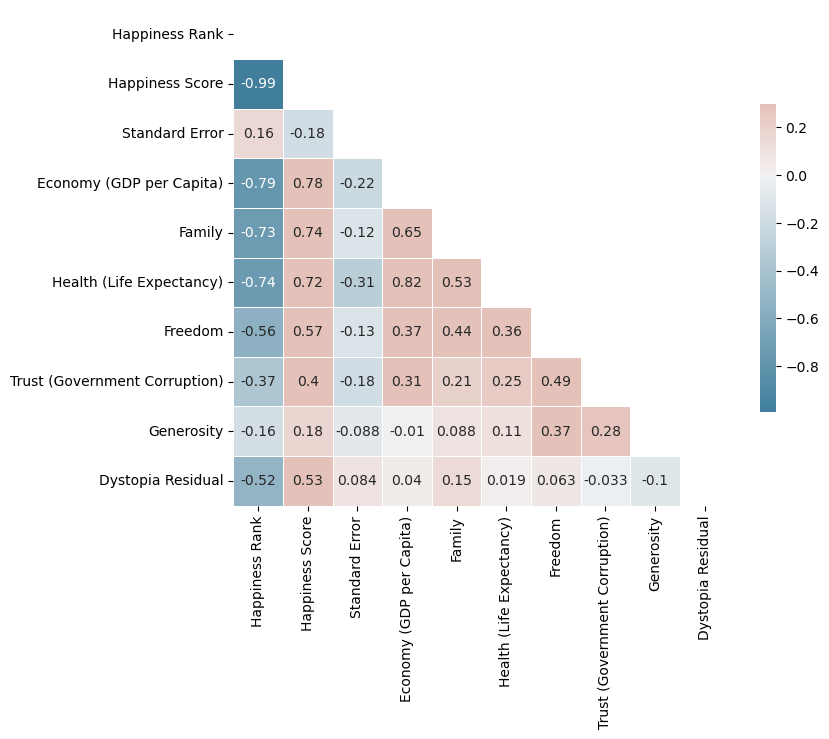

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotCorrelationMatrix(df, figSize):
    # Compute the correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=figSize)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.show()

nRowsRead = 1000
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df3 = pd.read_csv(url, delimiter=',', nrows=nRowsRead)
df3.dataframeName = '2017.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

plotCorrelationMatrix(df3, (8, 8))


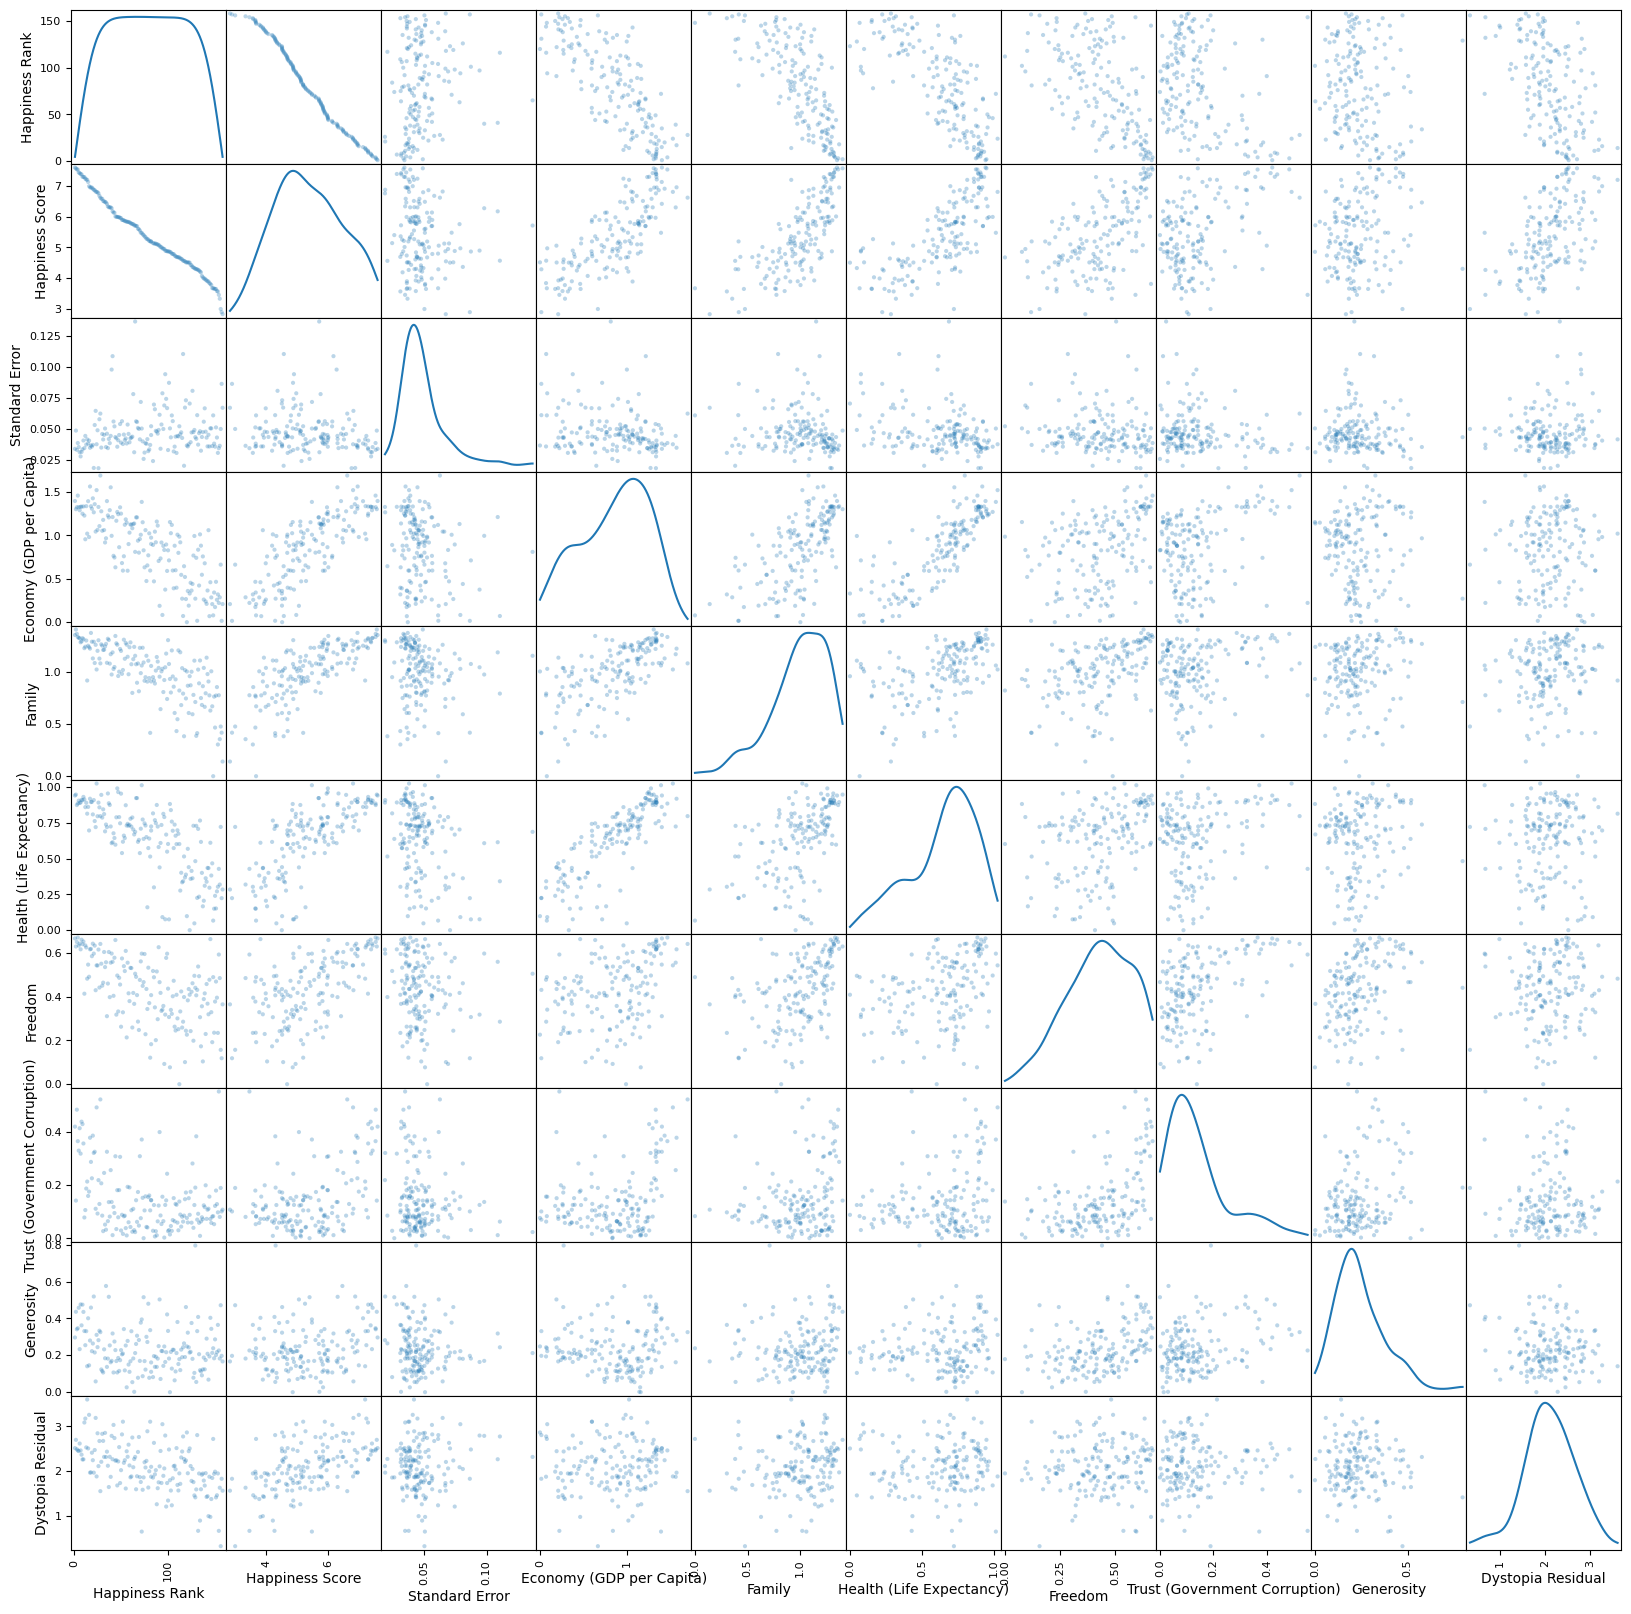

In [60]:
plotScatterMatrix(df3, 20, 10)
